In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 사용하는 버전
print(pd.__version__)
print(sns.__version__)

1.5.3
0.12.2


## 데이터 확인

In [ ]:
file_path = '.'
train = pd.read_csv(f'{file_path}/train.csv')
test = pd.read_csv(f'{file_path}/test.csv')
display(train.head())
display(test.head())
train.shape, test.shape

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67


((7500, 11), (7500, 10))

In [ ]:
# y 컬럼!
set(train.columns) - set(test.columns)

{'Calories_Burned'}

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 586.1+ KB


### 데이터 타입 변경

In [ ]:
train['Weight_Status'] = train['Weight_Status'].astype('category')
train['Gender'] = train['Gender'].astype('category')

test['Weight_Status'] = test['Weight_Status'].astype('category')
test['Gender'] = test['Gender'].astype('category')

display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        7500 non-null   object  
 1   Exercise_Duration         7500 non-null   float64 
 2   Body_Temperature(F)       7500 non-null   float64 
 3   BPM                       7500 non-null   float64 
 4   Height(Feet)              7500 non-null   float64 
 5   Height(Remainder_Inches)  7500 non-null   float64 
 6   Weight(lb)                7500 non-null   float64 
 7   Weight_Status             7500 non-null   category
 8   Gender                    7500 non-null   category
 9   Age                       7500 non-null   int64   
 10  Calories_Burned           7500 non-null   float64 
dtypes: category(2), float64(7), int64(1), object(1)
memory usage: 542.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        7500 non-null   object  
 1   Exercise_Duration         7500 non-null   float64 
 2   Body_Temperature(F)       7500 non-null   float64 
 3   BPM                       7500 non-null   float64 
 4   Height(Feet)              7500 non-null   float64 
 5   Height(Remainder_Inches)  7500 non-null   float64 
 6   Weight(lb)                7500 non-null   float64 
 7   Weight_Status             7500 non-null   category
 8   Gender                    7500 non-null   category
 9   Age                       7500 non-null   int64   
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 483.8+ KB


None

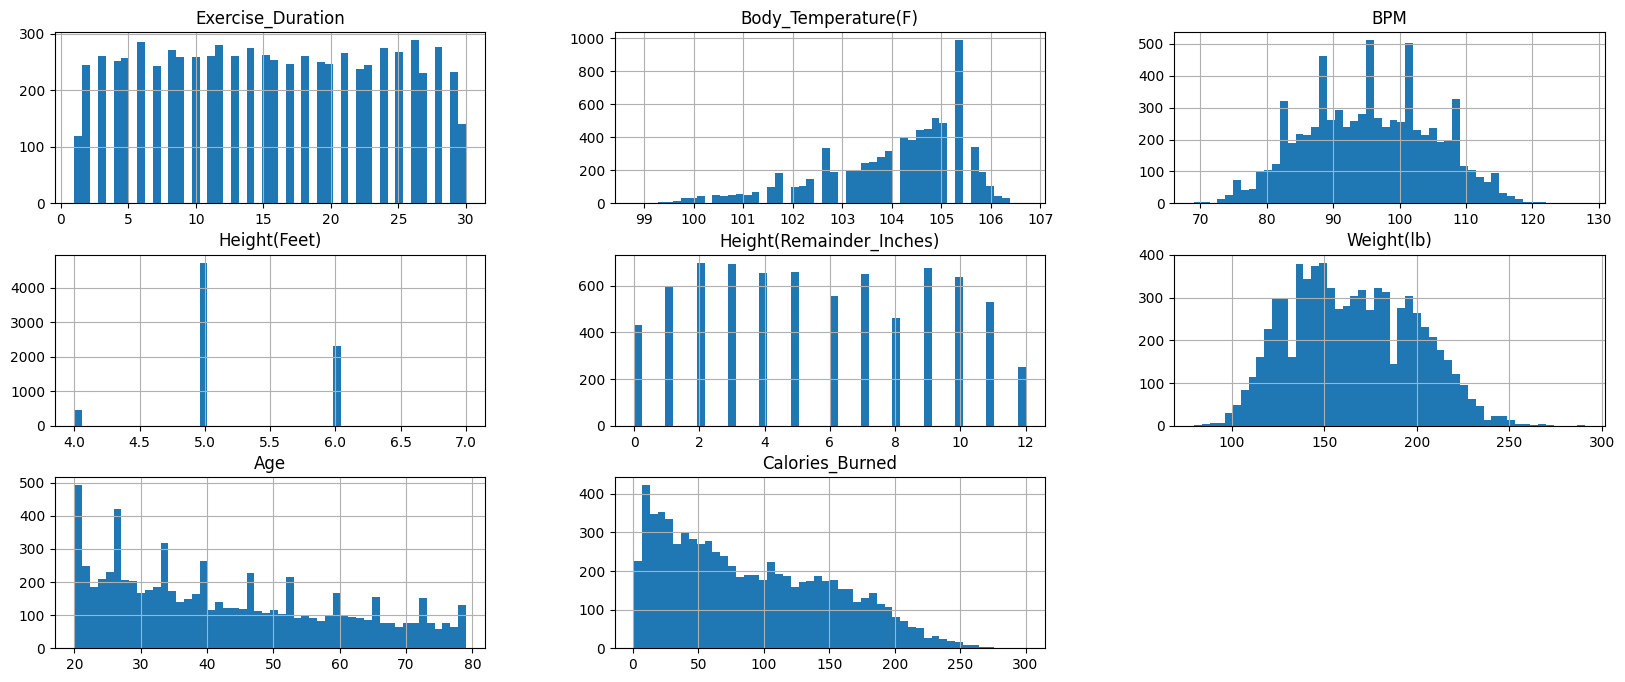

In [ ]:
train.hist(bins = 50, figsize=(20,8));

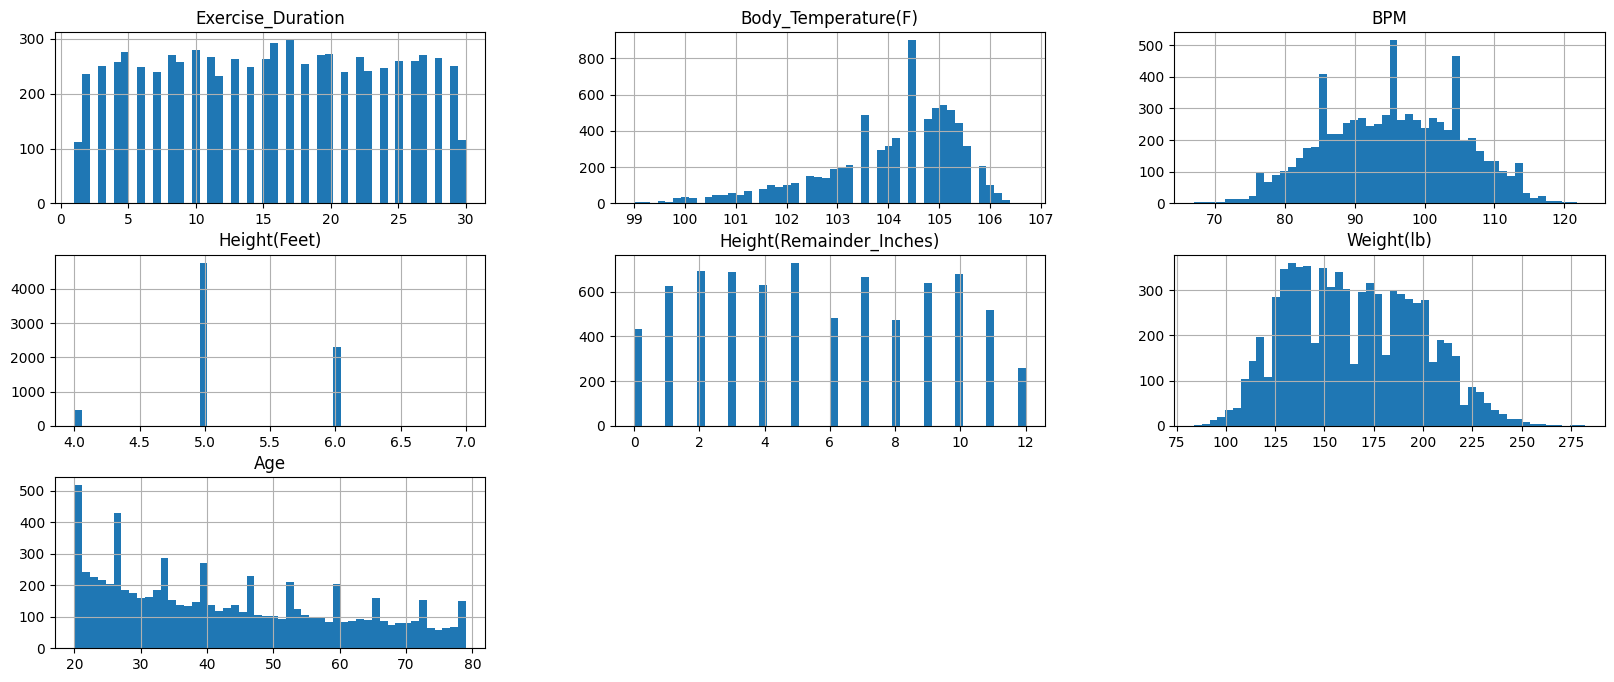

In [ ]:
test.hist(bins = 50, figsize=(20,8));

train, test 데이터 둘 다 비슷한 양상을 보이고 있음

In [ ]:
train['Weight_Status'].value_counts(1)

Normal Weight    0.624133
Overweight       0.348533
Obese            0.027333
Name: Weight_Status, dtype: float64

In [ ]:
train['Gender'].value_counts(1)

F    0.502533
M    0.497467
Name: Gender, dtype: float64

### 결측치 확인

In [ ]:
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [ ]:
test.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

### 요약 확인

In [ ]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [ ]:
test.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.560000,104.058200,95.538933,5.247067,5.714933,165.187413,42.943600
std,8.283402,1.391966,9.579919,0.554436,3.510078,32.986667,17.076529
min,1.000000,99.000000,67.000000,4.000000,0.000000,83.800000,20.000000
25%,8.000000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000
50%,16.000000,104.400000,96.000000,5.000000,5.000000,163.100000,40.000000
75%,23.000000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000
max,30.000000,106.700000,123.000000,7.000000,12.000000,282.200000,79.000000


## 컬럼변경

### 키 cm로 바꾸기

1피트는 30.48cm이고, 1인치는 2.54 cm입니다.

0번째 행의 Height(Feet)의 값은 5.0, Height(Remainder_Inches)의 값은 9.0 입니다.

cm로 변환을 위해  계산을 하면 5.0Feet * 30.48 + 9.0Inches * 2.54 = 175.26cm

<Axes: >

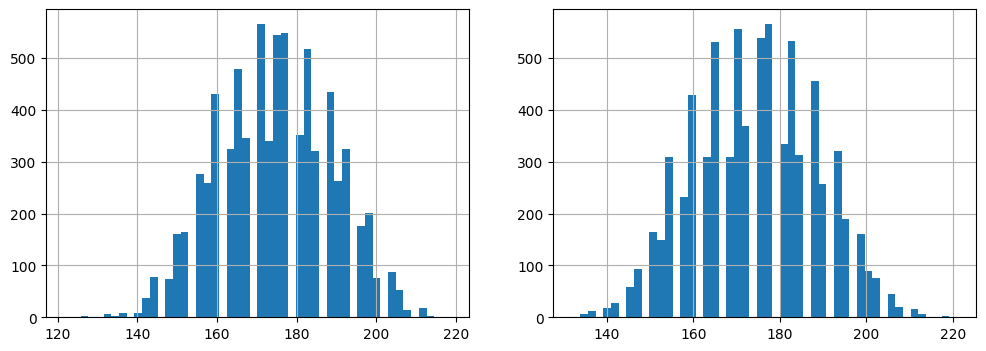

In [ ]:
train['Height(cm)'] = train['Height(Feet)'] * 30.48 + train['Height(Remainder_Inches)'] * 2.54
test['Height(cm)'] = test['Height(Feet)'] * 30.48 + test['Height(Remainder_Inches)'] * 2.54

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Height(cm)'].hist(bins=50)

plt.subplot(1,2,2)
test['Height(cm)'].hist(bins=50)

### 체중 Kg 바꾸기

1lb당 0.453592 kg

<Axes: >

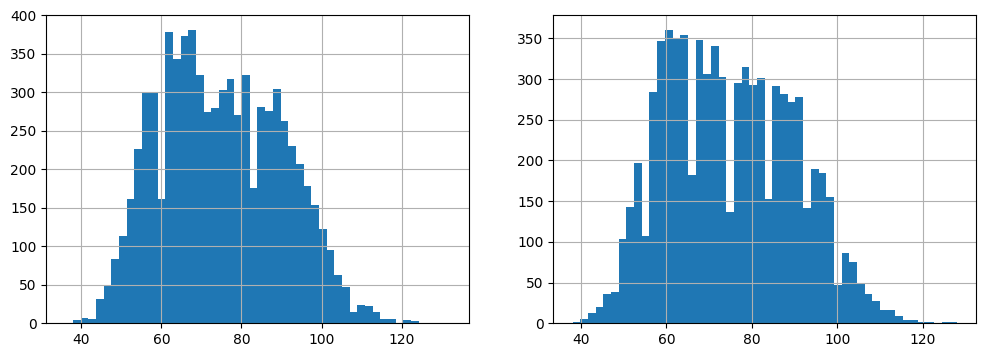

In [ ]:
train['Weight(kg)'] = train['Weight(lb)'] * 0.453592
test['Weight(kg)'] = test['Weight(lb)'] * 0.453592

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Weight(kg)'].hist(bins=50)

plt.subplot(1,2,2)
test['Weight(kg)'].hist(bins=50)


### BMI 컬럼생성
BMI = 몸무게 ÷키(m)²

<Axes: >

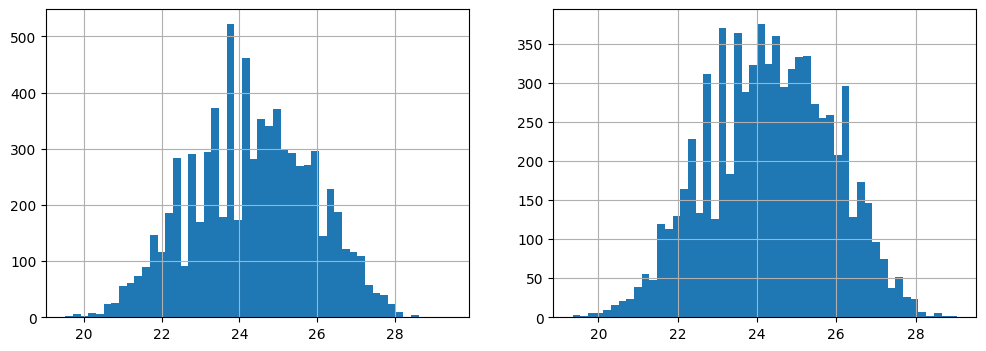

In [ ]:
train['BMI'] = train['Weight(kg)'] / ((train['Height(cm)']/100)**2)
test['BMI'] = test['Weight(kg)'] / ((test['Height(cm)']/100)**2)

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['BMI'].hist(bins=50)

plt.subplot(1,2,2)
test['BMI'].hist(bins=50)

### 나이 컬럼 스케일링 해보기

<Axes: >

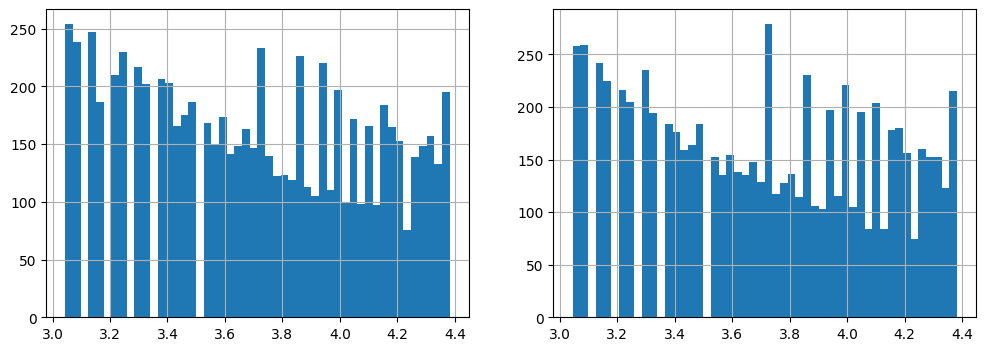

In [ ]:
train['Age_c'] = np.log1p(train['Age'])
test['Age_c'] = np.log1p(test['Age'])

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Age_c'].hist(bins=50)

plt.subplot(1,2,2)
test['Age_c'].hist(bins=50)

### 운동강도
- MHR(최대 심박수 = 220-나이)
- 운동강도 (분당심박수/최대심박수) * 100

In [ ]:
train['MHR'] = 220 - train['Age']
test['MHR'] = 220 - test['Age']

<Axes: >

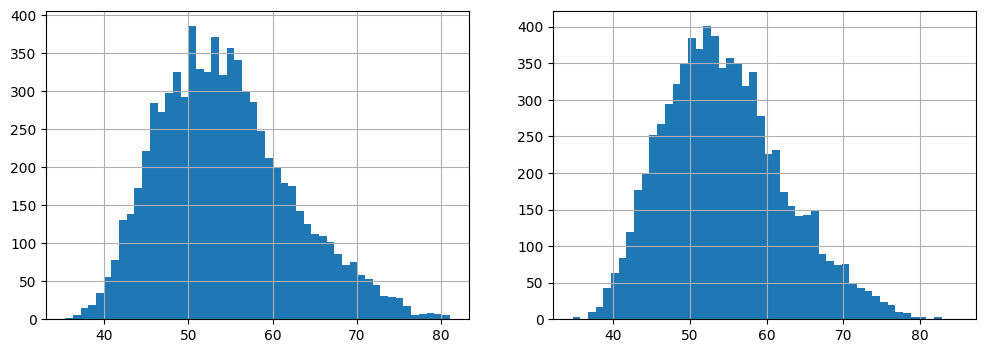

In [ ]:
train['Excise_intensity'] = (train['BPM']/train['MHR'])*100
test['Excise_intensity'] = (test['BPM']/test['MHR'])*100

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Excise_intensity'].hist(bins=50)

plt.subplot(1,2,2)
test['Excise_intensity'].hist(bins=50)

## EDA

### 섭씨온도 확인

<Axes: >

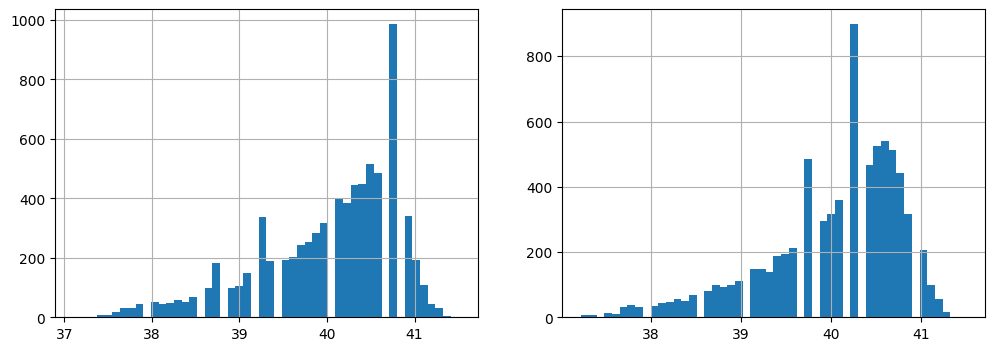

In [ ]:
train['Body_Temperature(C)'] = (train['Body_Temperature(F)'] - 32) / 1.8
test['Body_Temperature(C)'] = (test['Body_Temperature(F)'] - 32) / 1.8

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Body_Temperature(C)'].hist(bins=50)

plt.subplot(1,2,2)
test['Body_Temperature(C)'].hist(bins=50)


<Axes: >

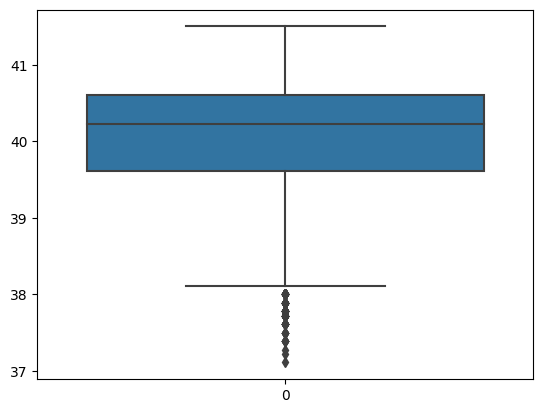

In [ ]:
sns.boxplot(data = train['Body_Temperature(C)'])

사람 몸이 어떻게 41도?

온도랑 bpm 비교 해보기

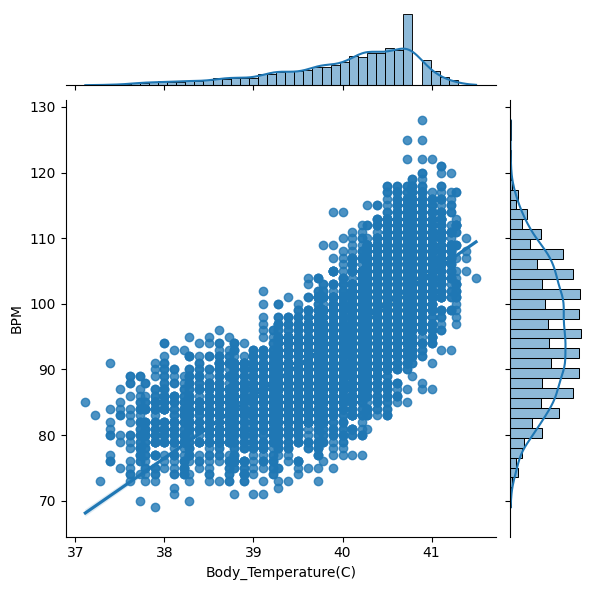

In [ ]:
sns.jointplot(data = train, x = 'Body_Temperature(C)', y = 'BPM', kind = 'reg')

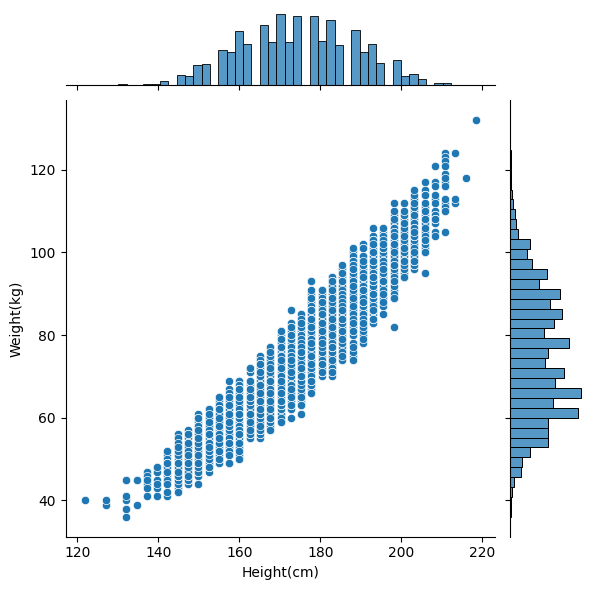

In [ ]:
# 몸무게랑 키랑 연관관계
sns.jointplot(data = train, x = 'Height(cm)', y = 'Weight(kg)')

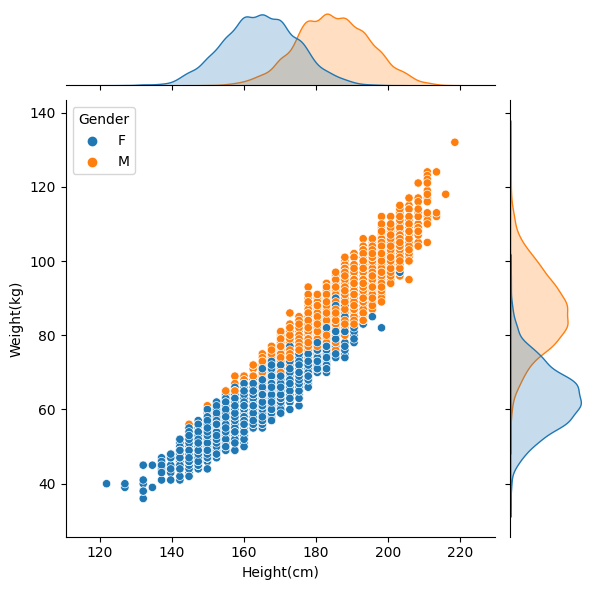

In [ ]:
# 남자가 여자보다 키도 크고 몸무게도 많이 나갈 것으로 예상
sns.jointplot(data = train, x = 'Height(cm)', y = 'Weight(kg)', hue ='Gender')

In [ ]:
train.columns

Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned', 'Height(cm)', 'Weight(kg)', 'BMI', 'Age_c',
       'MHR', 'Excise_intensity', 'Body_Temperature(C)'],
      dtype='object')

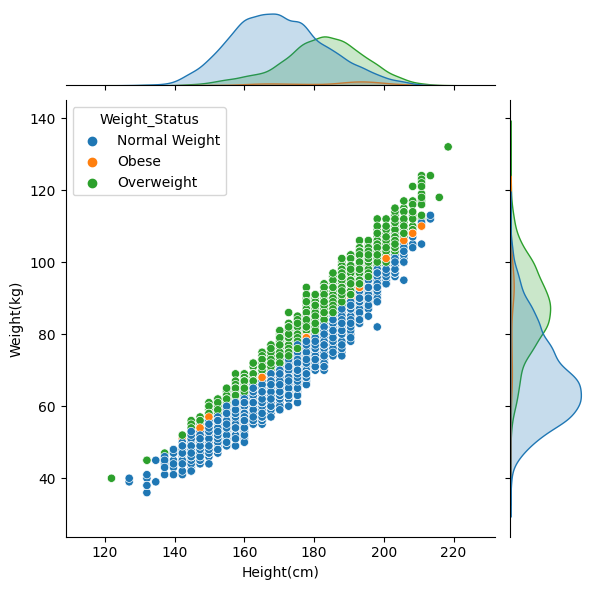

In [ ]:

sns.jointplot(data = train, x = 'Height(cm)', y = 'Weight(kg)', hue ='Weight_Status')

<Axes: xlabel='Age', ylabel='Calories_Burned'>

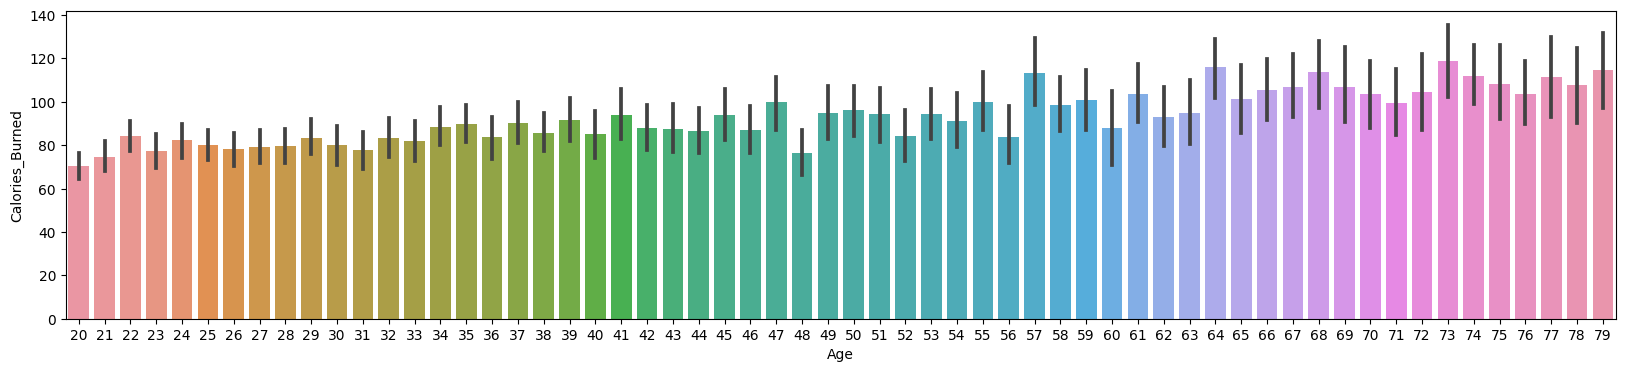

In [ ]:
# 나이랑 Calories_Burned 관계확인
plt.figure(figsize = (20,4))
sns.barplot(data = train, x = 'Age', y = 'Calories_Burned')

<Axes: xlabel='Gender', ylabel='Exercise_Duration'>

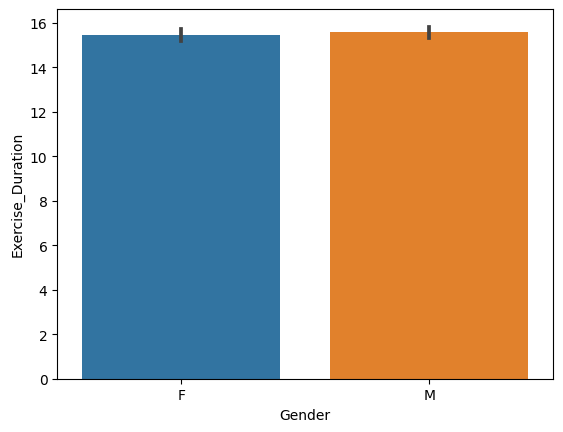

In [ ]:
sns.barplot(data =train, x = 'Gender', y='Exercise_Duration')

In [ ]:
train.groupby('Gender')['Exercise_Duration'].mean()

Gender
F    15.436455
M    15.566604
Name: Exercise_Duration, dtype: float64

<Axes: >

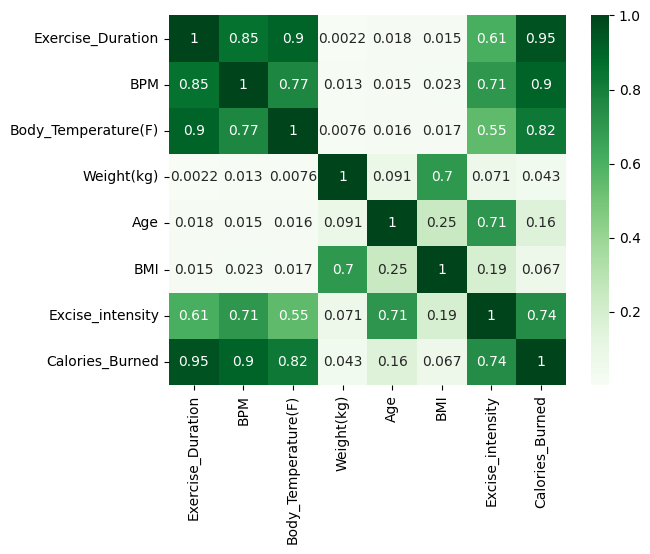

In [ ]:
cols = ['Exercise_Duration','BPM','Body_Temperature(F)', 'Weight(kg)',
        'Age','BMI','Excise_intensity', 'Calories_Burned']
sns.heatmap(data = train[cols].corr(), annot = True, cmap = 'Greens')

## 일단 부스팅 모델로 예측 레쭈고

In [ ]:
# 컬럼 확인하기
train.columns

Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned', 'Height(cm)', 'Weight(kg)', 'BMI', 'Age_c',
       'MHR', 'Excise_intensity', 'Body_Temperature(C)'],
      dtype='object')

In [ ]:
# gender 컬럼 숫자로 바꾸기
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Gender_enc']= le.fit_transform(train['Gender'])
test['Gender_enc']= le.transform(test['Gender'])

train['Gender_enc'][:5], test['Gender_enc'][:5]

(0    0
 1    1
 2    1
 3    0
 4    1
 Name: Gender_enc, dtype: int64,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Gender_enc, dtype: int64)

In [ ]:
# 필요한 컬럼만 가져오기
cols = ['Exercise_Duration','BPM','Body_Temperature(F)', 'Weight(kg)',
        'Age','BMI', 'Gender_enc','Excise_intensity']
label_name = 'Calories_Burned'
X_train = train[cols]
X_test = test[cols]
y_train = train[label_name]

X_train.shape, X_test.shape, y_train.shape

((7500, 8), (7500, 8), (7500,))

In [ ]:
# 학습, 검증 데이터 구분
from sklearn.model_selection import train_test_split

X_train_t, X_valid, y_train_t, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_t.shape, X_valid.shape, y_train_t.shape, y_valid.shape

((6750, 8), (750, 8), (6750,), (750,))

In [ ]:
import lightgbm 
model_lgbm = lightgbm.LGBMRegressor(n_estimators=100, random_state = 42)
model_lgbm

LGBMRegressor(random_state=42)

In [ ]:
model_lgbm.fit(X_train_t, y_train_t)

LGBMRegressor(random_state=42)

<Axes: >

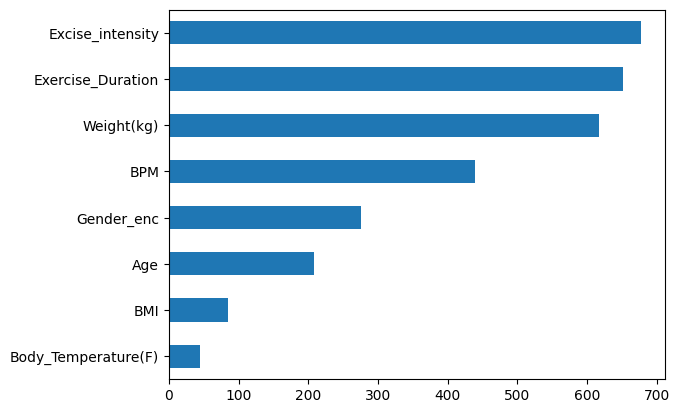

In [ ]:
# 피처 중요도 확인
fi = pd.Series(model_lgbm.feature_importances_)
fi.index = model_lgbm.feature_name_
fi.nlargest(20).sort_values().plot.barh()

In [ ]:
y_pred_lgbm = model_lgbm.predict(X_valid)
y_pred_lgbm[:5]

array([ 18.04986772, 135.4520785 , 119.34355025,  12.69629625,
        19.42824525])

In [ ]:
# rmse
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_valid, y_pred_lgbm))
rmse


1.8801574620322778

In [ ]:
y_pred = model_lgbm.predict(X_test)
y_pred

array([171.74372264, 188.21717857,  53.29627176, ..., 128.08148135,
        31.46977312, 188.80509245])

In [ ]:
# submit
submission = pd.read_csv('/content/sample_submission.csv', index_col = 'ID')
submission["Calories_Burned"] = y_pred
submission.head(2)

,Calories_Burned
ID,
TEST_0000,171.743723
TEST_0001,188.217179


In [ ]:
# 캐글에 제출
file_name = f'./sub_lgbm_{rmse:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

,Calories_Burned
ID,
TEST_0000,171.743723
TEST_0001,188.217179


1.80845

### 라벨 스무딩 해서 lightbgm

<Axes: >

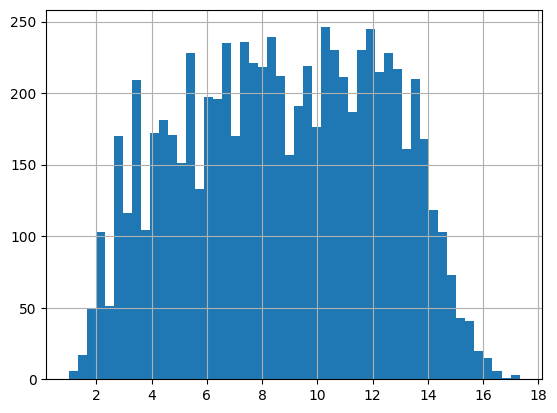

In [ ]:
train['Calories_Burned_sqrt'] = np.sqrt(train['Calories_Burned'])

train['Calories_Burned_sqrt'].hist(bins=50)

In [ ]:
# 필요한 컬럼만 가져오기
cols = ['Exercise_Duration','BPM','Body_Temperature(F)', 'Weight(kg)',
        'Age','BMI', 'Gender_enc','Excise_intensity']
label_name = 'Calories_Burned_sqrt'
X_train = train[cols]
X_test = test[cols]
y_train = train[label_name]

X_train.shape, X_test.shape, y_train.shape

((7500, 8), (7500, 8), (7500,))

In [ ]:
# 학습, 검증 데이터 구분
from sklearn.model_selection import train_test_split

X_train_t, X_valid, y_train_t, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_t.shape, X_valid.shape, y_train_t.shape, y_valid.shape

((6750, 8), (750, 8), (6750,), (750,))

In [ ]:
import lightgbm 
model_lgbm = lightgbm.LGBMRegressor(random_state = 42)
model_lgbm

LGBMRegressor(random_state=42)

In [ ]:
model_lgbm.fit(X_train_t, y_train_t)

LGBMRegressor(random_state=42)

<Axes: >

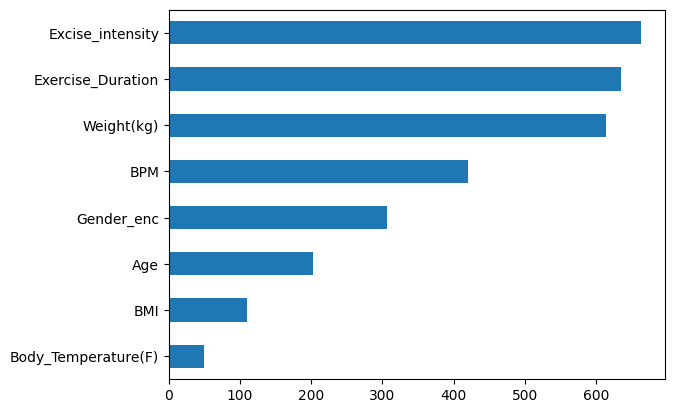

In [ ]:
# 피처 중요도 확인
fi = pd.Series(model_lgbm.feature_importances_)
fi.index = model_lgbm.feature_name_
fi.nlargest(20).sort_values().plot.barh()

In [ ]:
y_pred_lgbm = model_lgbm.predict(X_valid)
y_pred_lgbm[:5]

array([ 4.31604019, 11.75192614, 10.88447726,  3.58165388,  4.40728279])

In [ ]:
# rmse
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_valid**2, y_pred_lgbm**2))
rmse

1.8904911021058026

In [ ]:
y_pred = model_lgbm.predict(X_test)
y_pred= y_pred**2
y_pred

array([170.65682562, 189.89940366,  53.67248463, ..., 131.35046006,
        31.59202559, 191.49844162])

In [ ]:
# submit
submission = pd.read_csv('/content/sample_submission.csv', index_col = 'ID')
submission["Calories_Burned"] = y_pred

# 데이콘에 제출
file_name = f'./sub_lgbm_{rmse:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

,Calories_Burned
ID,
TEST_0000,170.656826
TEST_0001,189.899404


1.8333729925	

## 텐서플로우로 해보기

In [ ]:
# 컬럼 확인하기
train.columns

Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned', 'Height(cm)', 'Weight(kg)', 'BMI', 'Age_c',
       'MHR', 'Excise_intensity'],
      dtype='object')

In [ ]:
# gender 컬럼 숫자로 바꾸기
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Gender_enc']= le.fit_transform(train['Gender'])
test['Gender_enc']= le.transform(test['Gender'])

train['Gender_enc'][:5], test['Gender_enc'][:5]

(0    0
 1    1
 2    1
 3    0
 4    1
 Name: Gender_enc, dtype: int64,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Gender_enc, dtype: int64)

In [ ]:
# 필요한 컬럼만 가져오기
cols = ['Exercise_Duration','BPM','Body_Temperature(F)', 'Weight(kg)',
        'Age','BMI', 'Gender_enc','Excise_intensity']
label_name = 'Calories_Burned'
X_train = train[cols]
X_test = test[cols]
y_train = train[label_name]

X_train.shape, X_test.shape, y_train.shape

((7500, 8), (7500, 8), (7500,))

In [ ]:
# 학습, 검증 데이터 구분
from sklearn.model_selection import train_test_split

X_train_t, X_valid, y_train_t, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_t.shape, X_valid.shape, y_train_t.shape, y_valid.shape

((6750, 8), (750, 8), (6750,), (750,))

In [ ]:
import tensorflow as tf

In [ ]:
input_shape = X_train_t.iloc[0].shape
input_shape

(8,)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=input_shape),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 256)               2304      
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 43,553
Trainable params: 43,537
Non-trainable params: 16
_________________________________________________

In [ ]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train_t, y_train_t, epochs = 1000,verbose=0,
                    validation_split=0.1,
                    callbacks=[early_stop,PrintDot()])
history


....................................................................................................
....................................................................................................
....................................................................................................
...............................................................................................

In [ ]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,10523.613281,81.386963,10523.613281,9401.974609,76.199715,9401.974609
1,9351.598633,75.071007,9351.598633,8330.682617,70.511597,8330.682617
2,8309.904297,69.708839,8309.904297,7379.019043,65.700859,7379.019043
3,7389.781738,65.279999,7389.781738,6545.770508,61.672859,6545.770508
4,6573.454590,61.589363,6573.454590,5815.687500,58.337200,5815.687500
...,...,...,...,...,...,...
390,151.233521,9.136702,151.233521,27.166021,4.103992,27.166021
391,176.308792,9.887265,176.308792,19.732441,2.990505,19.732441
392,137.665573,8.696371,137.665573,25.112104,3.665688,25.112104
393,160.136337,9.074161,160.136337,20.387386,3.427661,20.387386


In [ ]:
loss, mae, mse = model.evaluate(X_valid, y_valid)
loss, mae, mse

24/24 [==============================] - 0s 2ms/step - loss: 22.1374 - mae: 3.2574 - mse: 22.1374


(22.137393951416016, 3.2573564052581787, 22.137393951416016)

In [ ]:
rmse = np.sqrt(mse)
rmse

4.705039208276166

In [ ]:
# predict
y_predict = model.predict(X_test).flatten()
y_predict

235/235 [==============================] - 0s 1ms/step


array([175.43155 , 187.42928 ,  52.254177, ..., 129.00446 ,  33.544495,
       182.95334 ], dtype=float32)

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv', index_col = 'ID')
submission["Calories_Burned"] = y_predict
submission.head(2)

,Calories_Burned
ID,
TEST_0000,175.431549
TEST_0001,187.429276


In [ ]:
# 데이콘에 제출
file_name = f'./sub_{rmse:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

,Calories_Burned
ID,
TEST_0000,175.43155
TEST_0001,187.42928


3.8558511139

## 토치로 해보기

In [ ]:
# 컬럼 확인하기
train.columns

Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned', 'Height(cm)', 'Weight(kg)', 'BMI', 'Age_c',
       'MHR', 'Excise_intensity'],
      dtype='object')

In [ ]:
# gender 컬럼 숫자로 바꾸기
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Gender_enc']= le.fit_transform(train['Gender'])
test['Gender_enc']= le.transform(test['Gender'])

train['Gender_enc'][:5], test['Gender_enc'][:5]

(0    0
 1    1
 2    1
 3    0
 4    1
 Name: Gender_enc, dtype: int64,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Gender_enc, dtype: int64)

In [ ]:
# 필요한 컬럼만 가져오기
cols = ['Exercise_Duration','BPM','Body_Temperature(F)', 'Weight(kg)',
        'Age','BMI', 'Gender_enc','Excise_intensity']
label_name = 'Calories_Burned'
X_train = train[cols]
X_test = test[cols]
y_train = train[label_name]

X_train.shape, X_test.shape, y_train.shape

((7500, 8), (7500, 8), (7500,))

In [ ]:
# 학습, 검증 데이터 구분
from sklearn.model_selection import train_test_split

X_train_t, X_valid, y_train_t, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_t.shape, X_valid.shape, y_train_t.shape, y_valid.shape

((6750, 8), (750, 8), (6750,), (750,))

In [ ]:
# torch, nn, optim import 
import torch
import torch.nn as nn

import torch.optim as optim

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
# PyTorch 모델을 위한 데이터 변환
X_train_torch = torch.FloatTensor(X_train_t.values).to(device)
y_train_torch = torch.FloatTensor(y_train_t.values.reshape(-1,1)).to(device)

X_valid_t = torch.FloatTensor(X_valid.values)
y_valid_t = torch.FloatTensor(y_valid.values.reshape(-1,1))

X_test_t = torch.FloatTensor(X_test.values)

X_train_t.shape, y_train_t.shape, X_valid_t.shape, y_valid_t.shape, X_test_t.shape

((6750, 8),
 (6750,),
 torch.Size([750, 8]),
 torch.Size([750, 1]),
 torch.Size([7500, 8]))

In [ ]:
# Multivariate Linear Regression 모델 구현
# 모델 인스턴스 생성
# 손실 함수 및 최적화 알고리즘 설정
class MultivariateLinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultivariateLinearRegression, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_size)
        )
    
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x    

# 모델 인스턴스 생성
model = MultivariateLinearRegression(input_size = X_train_torch.shape[1], output_size = 1).to(device)
print(model)

MultivariateLinearRegression(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=8, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [ ]:
# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
num_epochs = 5000
loss_list = []
for epoch in range(num_epochs+1):
    y_pred = model(X_train_torch)
    loss = criterion(y_train_torch, y_pred)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss_list 시각화나 로그를 확인해 보기 위해 사용
    loss_list.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"epoch:{epoch}, loss:{loss.item()}")

epoch:99, loss:55.99596405029297
epoch:199, loss:26.8674259185791
epoch:299, loss:19.00226402282715
epoch:399, loss:15.63544750213623
epoch:499, loss:13.856489181518555
epoch:599, loss:12.526350021362305
epoch:699, loss:11.550702095031738
epoch:799, loss:10.711926460266113
epoch:899, loss:13.663033485412598
epoch:999, loss:10.732287406921387
epoch:1099, loss:10.616374015808105
epoch:1199, loss:9.274519920349121
epoch:1299, loss:12.937568664550781
epoch:1399, loss:11.029608726501465
epoch:1499, loss:6.0312418937683105
epoch:1599, loss:4.523588180541992
epoch:1699, loss:39.866554260253906
epoch:1799, loss:3.952716588973999
epoch:1899, loss:3.6907408237457275
epoch:1999, loss:3.460867404937744
epoch:2099, loss:3.29499888420105
epoch:2199, loss:3.1752889156341553
epoch:2299, loss:2.984332323074341
epoch:2399, loss:2.872936964035034
epoch:2499, loss:2.829043388366699
epoch:2599, loss:3.000124931335449
epoch:2699, loss:12.240802764892578
epoch:2799, loss:2.4708433151245117
epoch:2899, loss:2

<Axes: >

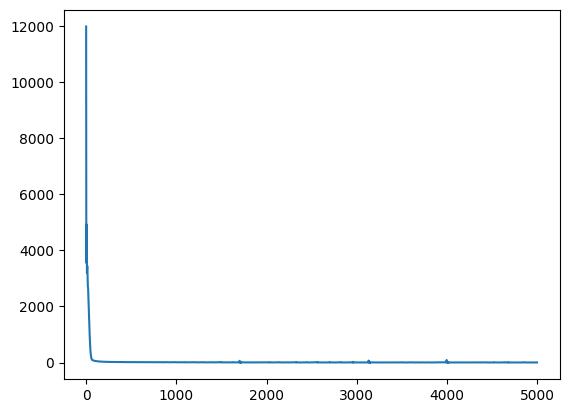

In [ ]:
pd.Series(loss_list).plot()

In [ ]:
# 검증 데이터에 대한 예측 결과 출력
with torch.no_grad():
    y_valid_pred = model(X_valid_t.to(device))
    print(f'val_loss : {criterion(y_valid_t.to(device), y_valid_pred.to(device)).item()}')

val_loss : 1.5726858377456665


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_valid_t.cpu().numpy(), y_valid_pred.cpu().numpy())
rmse = np.sqrt(mse)
rmse

1.2540678

In [ ]:
with torch.no_grad():
    y_predict = model(X_test_t.to(device))
y_predict.squeeze().shape

torch.Size([7500])

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv', index_col = 'ID')
submission["Calories_Burned"] = y_predict.cpu().numpy()

file_name = f'./sub_{rmse:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

,Calories_Burned
ID,
TEST_0000,174.00974
TEST_0001,193.20690


	1.310284023

### 레이어 진화~! 1


In [ ]:
# 학습, 검증 데이터 구분
from sklearn.model_selection import train_test_split

X_train_t, X_valid, y_train_t, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_t.shape, X_valid.shape, y_train_t.shape, y_valid.shape

((6750, 8), (750, 8), (6750,), (750,))

In [ ]:
# PyTorch 모델을 위한 데이터 변환
X_train_torch = torch.FloatTensor(X_train_t.values).to(device)
y_train_torch = torch.FloatTensor(y_train_t.values.reshape(-1,1)).to(device)

X_valid_t = torch.FloatTensor(X_valid.values)
y_valid_t = torch.FloatTensor(y_valid.values.reshape(-1,1))

X_test_t = torch.FloatTensor(X_test.values)

X_train_t.shape, y_train_t.shape, X_valid_t.shape, y_valid_t.shape, X_test_t.shape

((6750, 8),
 (6750,),
 torch.Size([750, 8]),
 torch.Size([750, 1]),
 torch.Size([7500, 8]))

In [ ]:
# torch, nn, optim import 
import torch
import torch.nn as nn

import torch.optim as optim

In [ ]:
# Multivariate Linear Regression 모델 구현
# 모델 인스턴스 생성
# 손실 함수 및 최적화 알고리즘 설정
class MultivariateLinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultivariateLinearRegression, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_size)
        )
    
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x    

# 모델 인스턴스 생성
model = MultivariateLinearRegression(input_size = X_train_torch.shape[1], output_size = 1).to(device)
print(model)

MultivariateLinearRegression(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=8, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [ ]:
# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
num_epochs = 3000
loss_list = []
for epoch in range(num_epochs+1):
    y_pred = model(X_train_torch)
    loss = criterion(y_train_torch, y_pred)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss_list 시각화나 로그를 확인해 보기 위해 사용
    loss_list.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"epoch:{epoch}, loss:{loss.item()}")

epoch:99, loss:1.4360079765319824
epoch:199, loss:1.3800415992736816
epoch:299, loss:1.4372833967208862
epoch:399, loss:1.5663341283798218
epoch:499, loss:1.3488389253616333
epoch:599, loss:1.291775107383728
epoch:699, loss:1.2537314891815186
epoch:799, loss:2.1080713272094727
epoch:899, loss:7.905202388763428
epoch:999, loss:1.275307536125183
epoch:1099, loss:1.2167681455612183
epoch:1199, loss:1.1856087446212769
epoch:1299, loss:12.521034240722656
epoch:1399, loss:1.249962329864502
epoch:1499, loss:1.1475492715835571
epoch:1599, loss:1.779722809791565
epoch:1699, loss:4.840581893920898
epoch:1799, loss:1.2090134620666504
epoch:1899, loss:1.1060084104537964
epoch:1999, loss:1.1465375423431396
epoch:2099, loss:1.2628167867660522
epoch:2199, loss:1.0798324346542358
epoch:2299, loss:3.9865641593933105
epoch:2399, loss:1.3500126600265503
epoch:2499, loss:18.86660385131836
epoch:2599, loss:1.1255850791931152
epoch:2699, loss:1.0661664009094238
epoch:2799, loss:3.0385422706604004
epoch:2899

<Axes: >

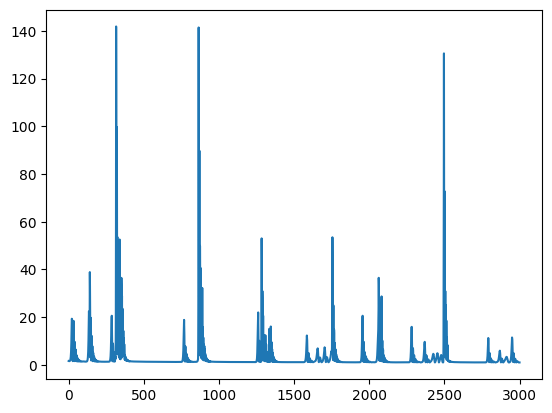

In [ ]:
pd.Series(loss_list).plot()

In [ ]:
# 검증 데이터에 대한 예측 결과 출력
with torch.no_grad():
    y_valid_pred = model(X_valid_t.to(device))
    print(f'val_loss : {criterion(y_valid_t.to(device), y_valid_pred.to(device)).item()}')

val_loss : 1.2656879425048828


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_valid_t.cpu().numpy(), y_valid_pred.cpu().numpy())
rmse = np.sqrt(mse)
rmse

1.125028

In [ ]:
with torch.no_grad():
    y_predict = model(X_test_t.to(device))
y_predict.squeeze().shape

torch.Size([7500])

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv', index_col = 'ID')
submission["Calories_Burned"] = y_predict.cpu().numpy()

file_name = f'./sub_{rmse:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

,Calories_Burned
ID,
TEST_0000,173.79858
TEST_0001,192.20152


### 레이어 진화!! 

In [ ]:
# torch, nn, optim import 
import torch
import torch.nn as nn

import torch.optim as optim

In [ ]:
# Multivariate Linear Regression 모델 구현
# 모델 인스턴스 생성
# 손실 함수 및 최적화 알고리즘 설정
class MultivariateLinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultivariateLinearRegression, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_size)
        )
    
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x    

# 모델 인스턴스 생성
model = MultivariateLinearRegression(input_size = X_train_torch.shape[1], output_size = 1).to(device)
print(model)

MultivariateLinearRegression(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=8, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [ ]:
# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
num_epochs = 2000
loss_list = []
for epoch in range(num_epochs+1):
    y_pred = model(X_train_torch)
    loss = criterion(y_train_torch, y_pred)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss_list 시각화나 로그를 확인해 보기 위해 사용
    loss_list.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"epoch:{epoch}, loss:{loss.item()}")

epoch:99, loss:35.93217468261719
epoch:199, loss:20.31829833984375
epoch:299, loss:15.828389167785645
epoch:399, loss:13.825943946838379
epoch:499, loss:15.564091682434082
epoch:599, loss:17.81136131286621
epoch:699, loss:11.254356384277344
epoch:799, loss:13.500243186950684
epoch:899, loss:9.0852632522583
epoch:999, loss:8.440771102905273
epoch:1099, loss:7.870728015899658
epoch:1199, loss:7.616580009460449
epoch:1299, loss:7.9311909675598145
epoch:1399, loss:6.776110649108887
epoch:1499, loss:5.8997368812561035
epoch:1599, loss:12.891745567321777
epoch:1699, loss:4.9264397621154785
epoch:1799, loss:6.729858875274658
epoch:1899, loss:3.914307117462158
epoch:1999, loss:5.847663402557373


<Axes: >

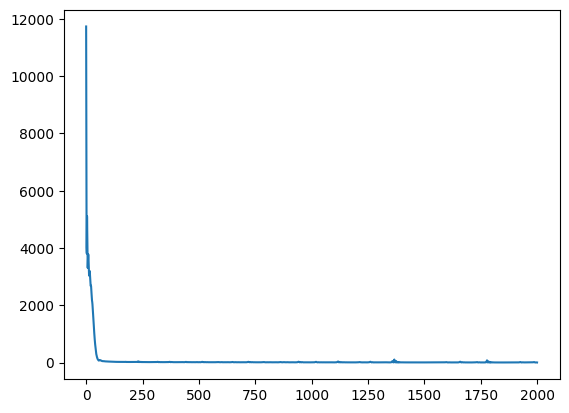

In [ ]:
pd.Series(loss_list).plot()

In [ ]:
# 검증 데이터에 대한 예측 결과 출력
with torch.no_grad():
    y_valid_pred = model(X_valid_t.to(device))
    print(f'val_loss : {criterion(y_valid_t.to(device), y_valid_pred.to(device)).item()}')

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_valid_t.cpu().numpy(), y_valid_pred.cpu().numpy())
rmse = np.sqrt(mse)
rmse

val_loss : 3.105278730392456


1.7621801

In [ ]:
with torch.no_grad():
    y_predict = model(X_test_t.to(device))
y_predict.squeeze().shape

torch.Size([7500])

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv', index_col = 'ID')
submission["Calories_Burned"] = y_predict.cpu().numpy()

file_name = f'./sub_{rmse:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

,Calories_Burned
ID,
TEST_0000,172.55002
TEST_0001,191.43033


1.8739456763

### 제발 좀 어떻게든 올랐으면

In [ ]:
# torch, nn, optim import 
import torch
import torch.nn as nn

import torch.optim as optim

In [ ]:
# Multivariate Linear Regression 모델 구현
# 모델 인스턴스 생성
# 손실 함수 및 최적화 알고리즘 설정
class MultivariateLinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultivariateLinearRegression, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 218),
            nn.ReLU(),
            nn.Linear(218, output_size)
        )
    
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x    

# 모델 인스턴스 생성
model = MultivariateLinearRegression(input_size = X_train_torch.shape[1], output_size = 1).to(device)
print(model)

MultivariateLinearRegression(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=8, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=218, bias=True)
    (7): ReLU()
    (8): Linear(in_features=218, out_features=1, bias=True)
  )
)


In [ ]:
# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
num_epochs = 2000
loss_list = []
for epoch in range(num_epochs+1):
    y_pred = model(X_train_torch)
    loss = criterion(y_train_torch, y_pred)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss_list 시각화나 로그를 확인해 보기 위해 사용
    loss_list.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"epoch:{epoch}, loss:{loss.item()}")

epoch:99, loss:39.59432601928711
epoch:199, loss:17.73920440673828
epoch:299, loss:16.75885772705078
epoch:399, loss:17.245542526245117
epoch:499, loss:11.982308387756348
epoch:599, loss:15.812089920043945
epoch:699, loss:11.387480735778809
epoch:799, loss:10.624048233032227
epoch:899, loss:11.133645057678223
epoch:999, loss:12.179732322692871
epoch:1099, loss:9.035482406616211
epoch:1199, loss:10.051697731018066
epoch:1299, loss:7.840219497680664
epoch:1399, loss:9.683320045471191
epoch:1499, loss:5.830190181732178
epoch:1599, loss:9.875177383422852
epoch:1699, loss:4.381110668182373
epoch:1799, loss:10.416583061218262
epoch:1899, loss:7.8518242835998535
epoch:1999, loss:94.3112564086914


In [ ]:
# 검증 데이터에 대한 예측 결과 출력
with torch.no_grad():
    y_valid_pred = model(X_valid_t.to(device))
    print(f'val_loss : {criterion(y_valid_t.to(device), y_valid_pred.to(device)).item()}')

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_valid_t.cpu().numpy(), y_valid_pred.cpu().numpy())
rmse = np.sqrt(mse)
rmse

val_loss : 16.904539108276367


4.111513

In [ ]:
with torch.no_grad():
    y_predict = model(X_test_t.to(device))
y_predict.squeeze().shape

torch.Size([7500])

In [ ]:

submission = pd.read_csv('/content/sample_submission.csv', index_col = 'ID')
submission["Calories_Burned"] = y_predict.cpu().numpy()

file_name = f'./sub_{rmse:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

,Calories_Burned
ID,
TEST_0000,177.87940
TEST_0001,190.87634
